In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

F:\python\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train = pd.read_csv('train_values.csv')
label = pd.read_csv('train_labels.csv')
test = pd.read_csv('test_values.csv')
train_data = train.merge(label,how='inner')
train_data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [3]:
label.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [4]:
thalDf = pd.DataFrame()
thalDf = pd.get_dummies(train_data['thal'],prefix='thal')
train_data = pd.concat([train_data,thalDf],axis=1)
train_data = train_data.drop('thal',axis=1)
train_data

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1
5,ldukkw,1,130,3,0,0,0,180,0.0,1,42,150,0,0,0,1,0
6,2gbyh9,2,150,4,2,0,2,258,2.6,0,60,157,0,1,0,0,1
7,daa9kp,2,150,4,1,0,2,276,0.6,1,57,112,1,1,1,0,0
8,3nwy2n,3,170,4,0,0,2,326,3.4,1,59,140,1,1,0,0,1
9,1r508r,2,120,3,0,0,0,219,1.6,0,50,158,0,0,0,1,0


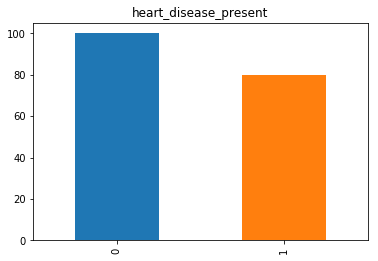

In [5]:
label.heart_disease_present.value_counts().plot.bar(title='heart_disease_present')

In [6]:
# 相关性分析
corr = train_data.corr()
print(corr['heart_disease_present'].sort_values(ascending=False))

heart_disease_present                   1.000000
thal_reversible_defect                  0.525145
exercise_induced_angina                 0.448647
num_major_vessels                       0.421519
chest_pain_type                         0.412829
oldpeak_eq_st_depression                0.382930
slope_of_peak_exercise_st_segment       0.344224
sex                                     0.335421
resting_ekg_results                     0.145933
age                                     0.138255
serum_cholesterol_mg_per_dl             0.079775
resting_blood_pressure                  0.078506
thal_fixed_defect                       0.024112
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
max_heart_rate_achieved                -0.375352
thal_normal                            -0.528812
Name: heart_disease_present, dtype: float64


In [7]:
selected_features = ['age', 
                     'sex', 
                     'max_heart_rate_achieved', 
                     'oldpeak_eq_st_depression',
                     'exercise_induced_angina',
                     'slope_of_peak_exercise_st_segment',
                     'num_major_vessels',
                     'chest_pain_type']
train_X = train_data[selected_features]

In [8]:
clf = LogisticRegression()
clf.fit(train_X,label.heart_disease_present)
clf.score(train_X,label.heart_disease_present)


0.8444444444444444

In [16]:
test_X = test[selected_features]
pred = clf.predict(test_X)
pred.shape

(90,)

In [17]:
pred = pred.astype('float32')

In [19]:
my_submission = pd.read_csv('submission_format.csv')
my_submission = pd.DataFrame(data=pred,
                             columns=submission_format.columns,
                             index=submission_format.index)
my_submission.to_csv('my_submission_lr_1.csv')

NameError: name 'submission_format' is not defined